# Airline Fare Prediction

### Data collection and Business Understanding is done 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r"C:\Users\ashwi\Airline_fare_prediction_ml\Flight_Price_resources (1)\Data_Train.xlsx")

In [4]:
data.head(5)
data.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
 data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
d=data.copy()

In [11]:
d.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
def change_type(col):
    d[col] = pd.to_datetime(d[col])

In [13]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [14]:
d.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
for f in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_type(f)

In [16]:
d.dtypes


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
d["Day_of_Journey"]=d["Date_of_Journey"].dt.day

In [18]:
d["month_of_Journey"]=d["Date_of_Journey"].dt.month

In [19]:
d["Year_of_Journey"]=d["Date_of_Journey"].dt.year

In [20]:
d.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-26 05:50:00,2024-08-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [21]:
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_min"] = df[col].dt.minute
    return df.head(3)

In [22]:
extract_hour_min(d, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-26 05:50:00,2024-08-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [23]:
extract_hour_min(d, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-26 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-26 05:50:00,2024-08-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-26 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [24]:
col_to_drop=['Dep_Time', 'Arrival_Time']
d.drop(col_to_drop, axis=1, inplace=True)

In [25]:
d.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [26]:
d.shape

(10682, 16)

In [27]:
def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

## Data Analysis

<Axes: xlabel='Dep_Time_hour'>

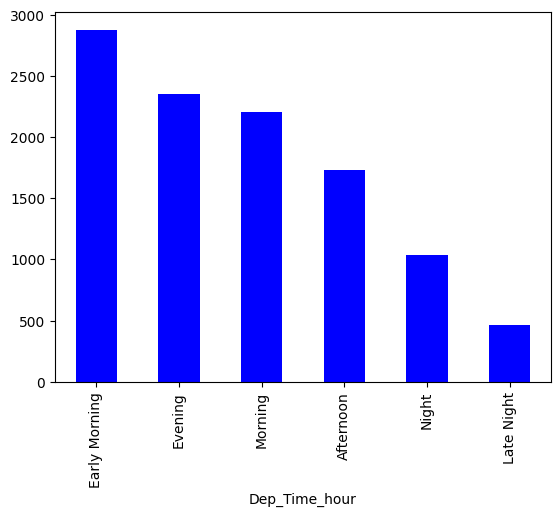

In [28]:
d['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="b")

In [29]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot , init_notebook_mode,  download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [30]:
d['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Dep_Time_hour
Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late Night        465
Name: count, dtype: int64

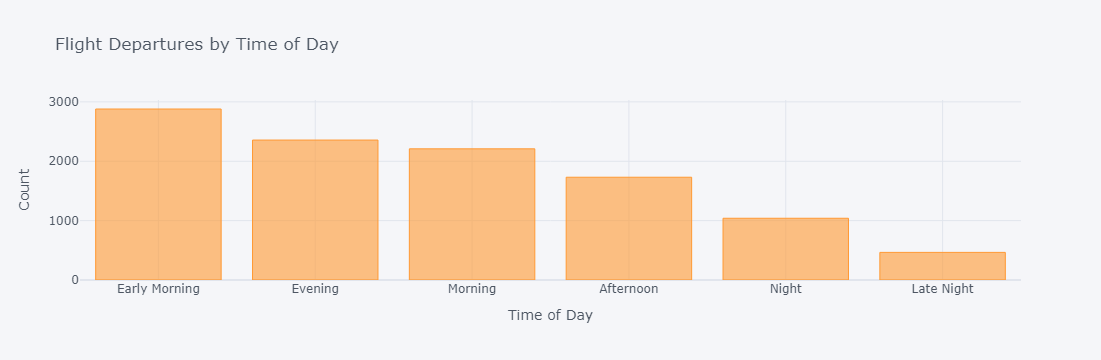

In [31]:
d['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar', title='Flight Departures by Time of Day', xTitle='Time of Day', yTitle='Count')

In [32]:
def preprocess_duration(x):
    if 'h' not in x:
        x= '0h' + ' ' + x
    elif 'm'not in x:
        x = x + ' ' + '0m'
    return x

In [33]:
d['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [34]:
int(d['Duration'][0].split(' ')[0][0:-1])

2

In [35]:
int(d['Duration'][0].split(' ')[1][0:-1])

50

In [36]:
d["Duration_hours"] = d['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [37]:
d["Duration_mins"] = d['Duration'].apply(lambda x : int(x.split(' ')[-1][0:-1]))

In [38]:
d.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,19


In [39]:
d['Duration_total_mins'] = d['Duration'].str.replace('h','*60').str.replace('m','*1').str.replace(' ','+').apply(eval)

In [40]:
d['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [41]:
 d.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'month_of_Journey', 'Year_of_Journey', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

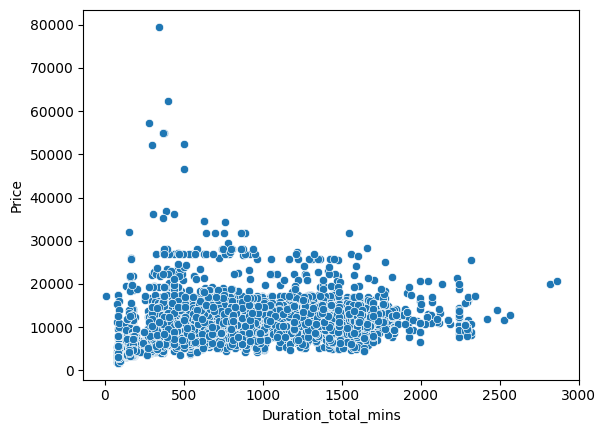

In [42]:
sns.scatterplot(y='Price',x='Duration_total_mins',data=d)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

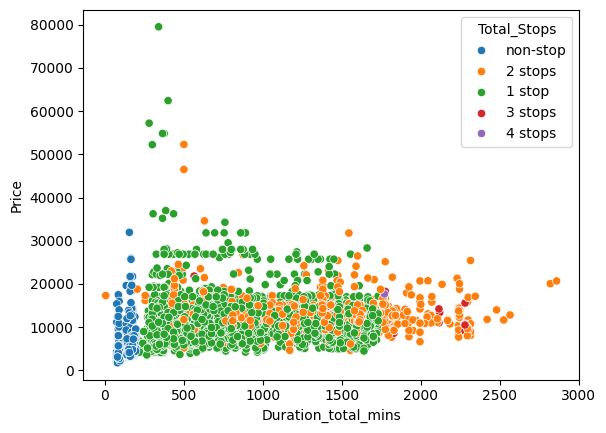

In [43]:
sns.scatterplot(y='Price',x='Duration_total_mins',hue="Total_Stops",data=d)

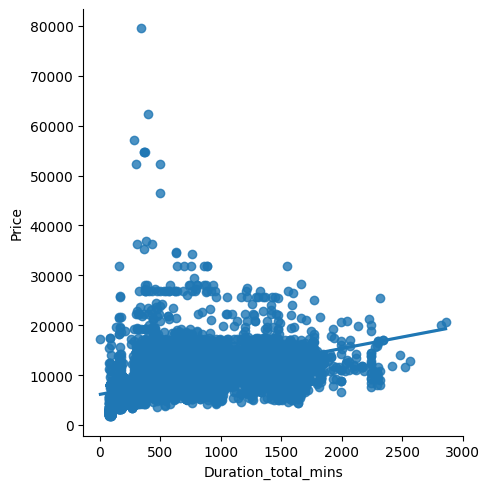

In [44]:
sns.lmplot(y='Price',x='Duration_total_mins',data=d)

In [45]:
d[d['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

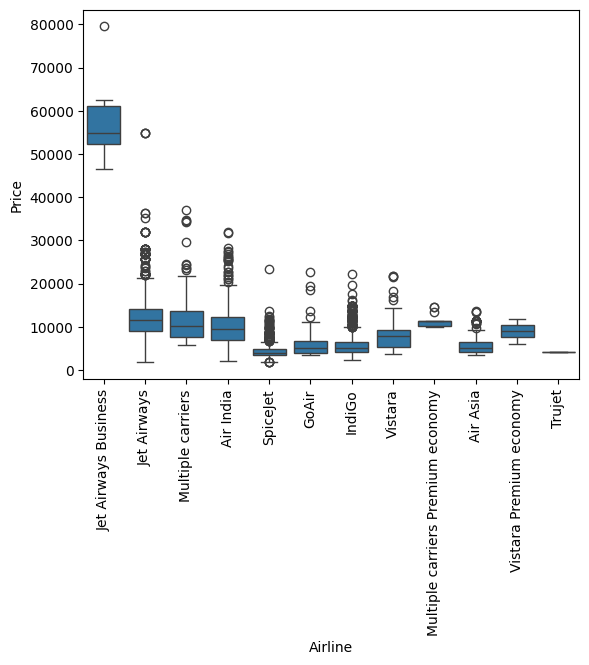

In [46]:
sns.boxplot(x='Airline', y='Price', data=d.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

## Feature Engineering

In [47]:
for sub_category in d['Source'].unique():
    d['Source_'+sub_category] = d['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [48]:
d.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [49]:
d.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [50]:
airlines = d.groupby(['Airline'])['Price'].mean().sort_values().index

In [51]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [52]:
airlines_dict = {key:index for index,key in enumerate(airlines,0)}

In [53]:
airlines_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [54]:
d['Airline'] = d['Airline'].map(airlines_dict)

In [55]:
d['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [56]:
d['Destination']

0           Delhi
1        Banglore
2          Cochin
3        Banglore
4           Delhi
           ...   
10678    Banglore
10679    Banglore
10680       Delhi
10681       Delhi
10682      Cochin
Name: Destination, Length: 10682, dtype: object

In [57]:
d['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [58]:
dest = d.groupby(['Destination'])['Price'].mean().sort_values().index

In [59]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [60]:
dest_dict = {key:index for index,key in enumerate(dest,0)}

In [61]:
dest_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [62]:
d['Destination'] =  d['Destination'].map(dest_dict)

In [63]:
d['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [64]:
d.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [65]:
d['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [67]:
d['Total_Stops'] = d['Total_Stops'].map(stop)

In [68]:
d.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h,2,No info,13882,9,...,4,25,19,19,1140,0,0,1,0,0


In [69]:
d["Additional_Info"].value_counts()/len(d)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [70]:
d.drop(columns = ['Date_of_Journey', 'Duration_total_mins', 'Additional_Info', 'Source', 'Year_of_Journey'],axis = 1 , inplace =  True)

In [71]:
d.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Day_of_Journey', 'month_of_Journey', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [72]:
d.drop(columns = ['Route'],axis = 1, inplace = True)

In [73]:
d.drop(columns = ['Duration'],axis = 1, inplace = True)

In [74]:
d.head(3)

,Airline,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,19,0,0,1,0,0


## Outliers

In [75]:
def plot(data , col):
    fig , (ax1,ax2,ax3) = plt.subplots(3,1)

    sns.distplot(data[col], ax=ax1)
    sns.boxplot(data[col], ax=ax2, orient='h')
    sns.distplot(data[col], ax=ax3, kde=False)

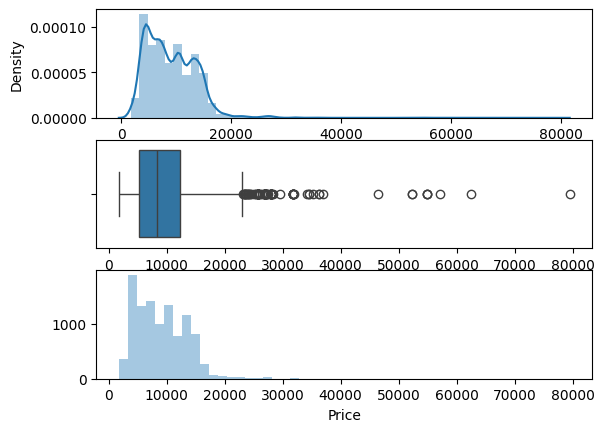

In [76]:
plot(d,'Price')

In [77]:
q3 = d['Price'].quantile(0.75)
q1 = d['Price'].quantile(0.25)

iqr = q3 - q1

maximum = q3+1.5*iqr
minimum = q1-1.5*iqr

In [78]:
print(maximum)

23017.0


In [79]:
print(minimum)

-5367.0


In [80]:
print([price for price in d['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


### Replacing outliers with median since it will not be affected by change in value while mean will

In [81]:
len([price for price in d['Price'] if price>maximum or price<minimum])

94

In [82]:
d['Price'] = np.where(d['Price']>=35000,d['Price'].median(),d['Price']) 

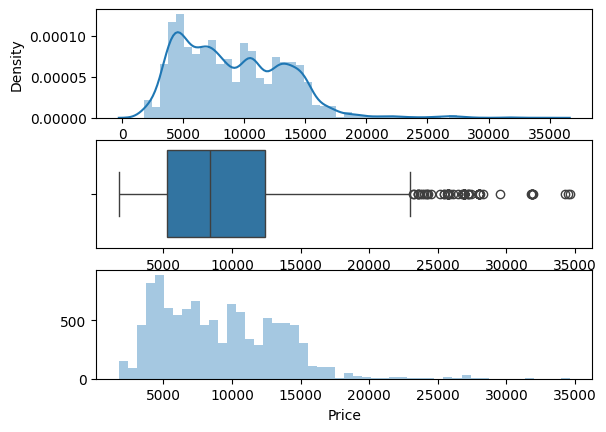

In [83]:
plot(d,'Price')

### Feature Selection

In [84]:
X = d.drop(['Price'], axis =1)

In [85]:
Y = d['Price']

In [86]:
from sklearn.feature_selection import mutual_info_regression

In [87]:
imp = mutual_info_regression(X , Y)

In [88]:
imp

array([1.32373128, 1.0639803 , 0.79681204, 0.37343856, 0.63316985,
       0.92390764, 0.75995057, 1.13594997, 0.89554694, 1.11998292,
       0.77681309, 0.37949658, 0.4596781 , 0.52336881, 0.14079761,
       0.19342549])

In [89]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [90]:
imp_df

,0
Airline,1.323731
Destination,1.063980
Total_Stops,0.796812
Day_of_Journey,0.373439
month_of_Journey,0.633170
Dep_Time_hour,0.923908
Dep_Time_min,0.759951
Arrival_Time_hour,1.135950
Arrival_Time_min,0.895547
Duration_hours,1.119983


In [91]:
 imp_df.columns=['importance']

In [92]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.323731
Arrival_Time_hour,1.135950
Duration_hours,1.119983
Destination,1.063980
Dep_Time_hour,0.923908
Arrival_Time_min,0.895547
Total_Stops,0.796812
Duration_mins,0.776813
Dep_Time_min,0.759951
month_of_Journey,0.633170


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(
    X,Y,test_size=0.25,random_state=42)

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
ml_model = RandomForestRegressor()

In [97]:
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
y_pred = ml_model.predict(x_test)

In [99]:
y_pred

array([16890.89,  5395.53,  8846.33, ...,  3491.62,  6301.02,  6880.28])

In [100]:
from sklearn import metrics

In [101]:
metrics.r2_score(y_test,y_pred)

0.8091372179994909

In [102]:
import pickle

In [103]:
file = open(r'C:\Users\ashwi\Airline_fare_prediction_ml\Flight_Price_resources (1)\rf_random.pkl','wb')

In [104]:
pickle.dump(ml_model, file)

In [105]:
model = open(r'C:\Users\ashwi\Airline_fare_prediction_ml\Flight_Price_resources (1)\rf_random.pkl','rb')

In [106]:
forest = pickle.load(model)

In [107]:
y_pred2 = forest.predict(x_test)

In [108]:
metrics.r2_score(y_test,y_pred2)

0.8091372179994909

In [109]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [110]:
mape(y_test, y_pred)

13.247879620300667

In [111]:
from sklearn import metrics

In [112]:
def predict(ml_model):
    model = ml_model.fit(x_train,y_train)
    print("Training Score : {}".format(model.score(x_train,y_train)))
    y_prediction = model.predict(x_test)
    print("Predictions are : {}".format(y_prediction))
    print("\n")
    r2_score = metrics.r2_score(y_test, y_prediction)
    print("r2 score : {}".format(r2_score))
    print("MAE : {}".format(metrics.mean_absolute_error(y_test, y_prediction)))
    print("MSE : {}".format(metrics.mean_squared_error(y_test, y_prediction)))
    print("RMSE : {}".format(np.sqrt(metrics.root_mean_squared_error(y_test, y_prediction))))
    print("MAPE : {}".format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Training Score : 0.9519137725488462
Predictions are : [16805.84  5504.94  8825.58 ...  3543.77  6244.11  6853.26]


r2 score : 0.8102743641165635
MAE : 1176.1680786659988
MSE : 3693502.7256479086
RMSE : 43.838895721019895
MAPE : 13.136572037929788


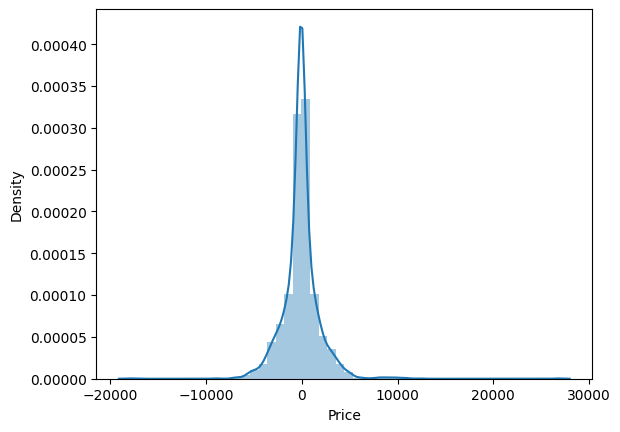

In [113]:
predict(RandomForestRegressor())

In [114]:
from sklearn.tree import DecisionTreeRegressor


Training Score : 0.966591628243878
Predictions are : [16840.  4959.  9397. ...  3419.  5797.  6442.]


r2 score : 0.6811841307847666
MAE : 1390.9704854611257
MSE : 6206579.708868298
RMSE : 49.91293225788713
MAPE : 15.333916514193909


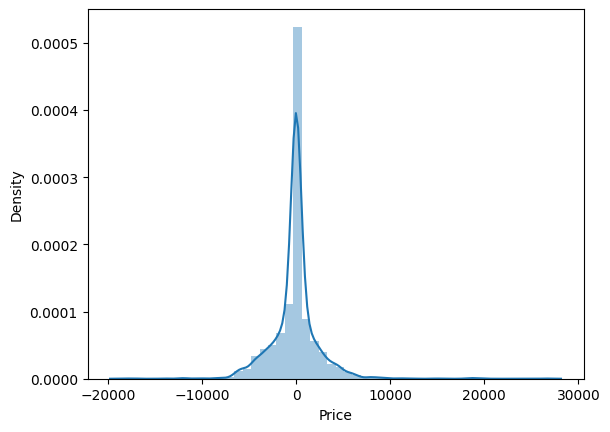

In [115]:
predict(DecisionTreeRegressor())

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
reg_rf = RandomForestRegressor()

In [118]:
np.linspace(start = 100 , stop = 1200 ,  num =6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [119]:
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 ,  num =6)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(start = 5 , stop = 30 ,  num =4)]
min_samples_split = [5,10,15,100]


In [120]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [121]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [122]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3,n_jobs=-1,verbose=2)

In [123]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [124]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [125]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=320)

In [126]:
RandomForestRegressor(max_depth=13, max_features='log2', min_samples_split=5,
                      n_estimators=980)

RandomForestRegressor(max_depth=13, max_features='log2', min_samples_split=5,
                      n_estimators=980)

In [127]:
rf_random.best_score_

0.8053003012157705

## Saving model

In [128]:
import pickle

file = open('Flight_fare_prediction.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()


In [129]:
model = open('Flight_fare_prediction.pkl', 'rb')
forest = pickle.load(model)

In [136]:
import numpy as np
import pickle
import pandas as pd

# Load your trained model
try:
    with open('flight_fare_model.pkl', 'rb') as file:
        model = pickle.load(file)
        if not hasattr(model, 'predict'):
            raise ValueError("Loaded object does not have a 'predict' method.")
except EOFError as e:
    print("Error loading the model: File is empty or corrupted.", e)
except ValueError as e:
    print("Error with the loaded model:", e)
except Exception as e:
    print("An unexpected error occurred:", e)

# Load encoders if you saved them
# Example:
# try:
#     with open('label_encoder_airline.pkl', 'rb') as file:
#         le_airline = pickle.load(file)
# except EOFError as e:
#     print("Error loading the label encoder:", e)
# except Exception as e:
#     print("An unexpected error occurred:", e)

# Function to prepare input features and predict fare
def prepare_and_predict(airline, date, source, destination, stops, duration):
    # Extract day and month from the date
    day = int(date.split('-')[0])
    month = int(date.split('-')[1])
    
    # Assuming 'airline', 'source', and 'destination' are already label encoded
    # If not, encode them manually or using the encoder objects
    # Example: airline = le_airline.transform([airline])[0]
    
    # Create a feature array similar to what your model expects
    features = np.array([[airline, day, month, source, destination, stops, duration]])

    # Ensure that the feature array is of the same format that the model expects
    feature_columns = ['Airline', 'Day_of_Journey', 'Month_of_Journey', 'Source', 'Destination', 'Total_Stops', 'Duration']
    input_df = pd.DataFrame(features, columns=feature_columns)
    
    # Predict the fare using the model
    if hasattr(model, 'predict'):
        predicted_fare = model.predict(input_df)
    else:
        raise ValueError("Model does not have a 'predict' method.")
    
    return predicted_fare

# Example: Manual inputs for testing the model
airline = 1  # Example: Label-encoded value for airline
date = '15-08-2024'  # Example date
source = 2  # Example: Label-encoded value for source
destination = 3  # Example: Label-encoded value for destination
stops = 1  # Example: Number of stops
duration = 120  # Example: Duration in minutes

# Call the function to predict the fare
try:
    predicted_fare = prepare_and_predict(airline, date, source, destination, stops, duration)
    # Print the predicted fare
    print(f"The predicted fare is: {predicted_fare[0]}")
except Exception as e:
    print("An error occurred during prediction:", e)


An error occurred during prediction: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [133]:
import pickle
from sklearn.ensemble import RandomForestRegressor  # Example model

# Assuming you have a trained model (example: RandomForestRegressor)
model = RandomForestRegressor()  # Replace with your trained model

# Save the model to a file
with open('flight_fare_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [134]:
import pickle

# Example code to save the model
with open('flight_fare_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [135]:
import pickle

# Load your trained model
try:
    with open('flight_fare_model.pkl', 'rb') as file:
        model = pickle.load(file)
except EOFError as e:
    print("Error loading the model: File is empty or corrupted.", e)
except ValueError as e:
    print("Error with the loaded model:", e)
except Exception as e:
    print("An unexpected error occurred:", e)


In [137]:
import numpy as np
import pickle
import pandas as pd

# Load your trained model
try:
    with open('flight_fare_model.pkl', 'rb') as file:
        model = pickle.load(file)
        if not hasattr(model, 'predict'):
            raise ValueError("Loaded object does not have a 'predict' method.")
except EOFError as e:
    print("Error loading the model: File is empty or corrupted.", e)
except ValueError as e:
    print("Error with the loaded model:", e)
except Exception as e:
    print("An unexpected error occurred:", e)

# Load encoders if you saved them
# Example:
# try:
#     with open('label_encoder_airline.pkl', 'rb') as file:
#         le_airline = pickle.load(file)
# except EOFError as e:
#     print("Error loading the label encoder:", e)
# except Exception as e:
#     print("An unexpected error occurred:", e)

# Function to prepare input features and predict fare
def prepare_and_predict(airline, date, source, destination, stops, duration):
    # Extract day and month from the date
    day = int(date.split('-')[0])
    month = int(date.split('-')[1])
    
    # Assuming 'airline', 'source', and 'destination' are already label encoded
    # If not, encode them manually or using the encoder objects
    # Example: airline = le_airline.transform([airline])[0]
    
    # Create a feature array similar to what your model expects
    features = np.array([[airline, day, month, source, destination, stops, duration]])

    # Ensure that the feature array is of the same format that the model expects
    feature_columns = ['Airline', 'Day_of_Journey', 'Month_of_Journey', 'Source', 'Destination', 'Total_Stops', 'Duration']
    input_df = pd.DataFrame(features, columns=feature_columns)
    
    # Predict the fare using the model
    if hasattr(model, 'predict'):
        predicted_fare = model.predict(input_df)
    else:
        raise ValueError("Model does not have a 'predict' method.")
    
    return predicted_fare

# Example: Manual inputs for testing the model
airline = 1  # Example: Label-encoded value for airline
date = '15-08-2024'  # Example date
source = 2  # Example: Label-encoded value for source
destination = 3  # Example: Label-encoded value for destination
stops = 1  # Example: Number of stops
duration = 120  # Example: Duration in minutes

# Call the function to predict the fare
try:
    predicted_fare = prepare_and_predict(airline, date, source, destination, stops, duration)
    # Print the predicted fare
    print(f"The predicted fare is: {predicted_fare[0]}")
except Exception as e:
    print("An error occurred during prediction:", e)


An error occurred during prediction: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [139]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor()
model.fit(x_train, y_train)  # Replace with your training data

# Save the trained model
with open('flight_fare_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [142]:
import numpy as np
import pandas as pd
import pickle

# Load the trained model
try:
    with open(r'C:\Users\ashwi\Airline_fare_prediction_ml\Flight_Price_resources (1)\rf_random.pkl', 'rb') as file:
        model = pickle.load(file)
except EOFError as e:
    print("Error loading the model: File is empty or corrupted.", e)
except ValueError as e:
    print("Error with the loaded model:", e)
except Exception as e:
    print("An unexpected error occurred:", e)

# Function to prepare input features and predict fare
def prepare_and_predict(airline, date, source, destination, stops, duration):
    # Extract day and month from the date
    day = int(date.split('-')[0])
    month = int(date.split('-')[1])
    
    # Create a feature array
    features = np.array([[airline, day, month, source, destination, stops, duration]])

    # Ensure the feature array matches the model's expected input format
    feature_columns = ['Airline', 'Day_of_Journey', 'Month_of_Journey', 'Source', 'Destination', 'Total_Stops', 'Duration']
    input_df = pd.DataFrame(features, columns=feature_columns)
    
    # Predict the fare using the model
    if hasattr(model, 'predict'):
        predicted_fare = model.predict(input_df)
    else:
        raise ValueError("Model does not have a 'predict' method.")
    
    return predicted_fare

# Example: Manual inputs for testing the model
airline = 1  # Example: Label-encoded value for airline
date = '15-08-2024'  # Example date
source = 1  # Example: Label-encoded value for source
destination = 3  # Example: Label-encoded value for destination
stops = 1  # Example: Number of stops
duration = 120  # Example: Duration in minutes

# Call the function to predict the fare
try:
    predicted_fare = prepare_and_predict(airline, date, source, destination, stops, duration)
    # Print the predicted fare
    print(f"The predicted fare is: {predicted_fare[0]}")
except Exception as e:
    print("An error occurred during prediction:", e)


An error occurred during prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Duration
- Month_of_Journey
- Source
Feature names seen at fit time, yet now missing:
- Arrival_Time_hour
- Arrival_Time_min
- Dep_Time_hour
- Dep_Time_min
- Duration_hours
- ...

